In [45]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [47]:
import gensim
import nltk
import spacy
from gensim.utils import simple_preprocess
from optimize3 import compute_optimize3
import matplotlib.pyplot as plt

In [70]:
# load the preprocessed dataset and remove any empty lists
cleaned_df = pd.read_csv('clean_nlp_text.csv')
clean_ar = [eval(token) for token in cleaned_df['clean_text']]
clean_ar0 = [token for token in clean_ar if token!=[]]
clean_ar0[:10]

[['sell'],
 ['probably',
  'airdrop',
  'token',
  'wallet',
  'try',
  'help',
  'kickstart',
  'project',
  'week',
  'ago',
  'liquiio',
  'wallet',
  'feel',
  'airdrop',
  'thing',
  'become',
  'popular',
  'way',
  'advertise',
  'platform'],
 ['soon'],
 ['list',
  'thread',
  'subreddit',
  'content',
  'bot',
  'remove',
  'comment',
  'reply',
  'delete'],
 ['set', 'token', 'make', 'sure', 'deposit', 'token'],
 ['well', 'whale'],
 ['sure'],
 ['guarantee', 'rise', 'play', 'really', 'safe', 'though', 'think', 'smart'],
 ['delete'],
 ['kiss', 'wealth', 'goodbye']]

In [71]:
#create a dictionary of words contained in all comments
#clean_ar0  = clean_ar0[:100]

dictionary = gensim.corpora.Dictionary(clean_ar0)

#dictionary.filter_extremes(no_below = 0, no_above=0.1, keep_n= 0)
count = 0
for k,v in dictionary.iteritems():
    print(k,v)
    count +=1
    if count > 10:
        break

0 sell
1 advertise
2 ago
3 airdrop
4 become
5 feel
6 help
7 kickstart
8 liquiio
9 platform
10 popular


In [72]:
# document term matrix
corpus = [dictionary.doc2bow(doc) for doc in clean_ar0]

In [73]:
# optimize for coherent values
topics, coherence_values, perp_values = compute_optimize3(dictionary = dictionary,
                                                         corpus = corpus,
                                                         texts = clean_ar0,
                                                         start = 2,
                                                         limit = 50,
                                                         step=2)

df = pd.DataFrame()
df['topics'] = topics
df['coherence_values'] = coherence_values
df['perp_values'] = perp_values
df.to_csv('optimize_values')

In [74]:
coherence_values

[0.5891129597772903,
 0.6549414969650723,
 0.6922784428793817,
 0.6377843324723693,
 0.6246872882912875,
 0.6170497108170127,
 0.6328963003441473,
 0.5775305222897915,
 0.6095042018343247,
 0.5979259160515102,
 0.6068020165358902,
 0.5809563751894009,
 0.6065727604667196,
 0.5942160867678915,
 0.5819366438773568,
 0.5807071863900259,
 0.5728917832196521,
 0.5481297898160918,
 0.5459842262957181,
 0.5448894469998431,
 0.5467612016463689,
 0.5512324562026035,
 0.5222445918385622,
 0.5289763476847451]

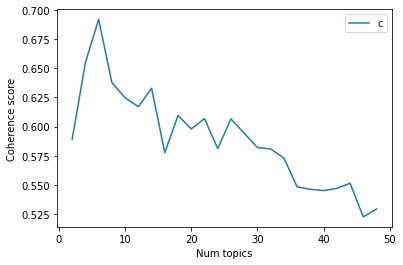

In [75]:
# graphical representation
limit=50; start=2;step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel('Num topics')
plt.ylabel('Coherence score')
plt.legend(("coherence_values"), loc='best')
plt.show()

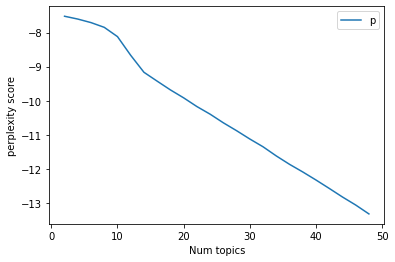

In [76]:
# graphical representation
limit=50; start=2;step=2;
x = range(start, limit, step)
plt.plot(x, perp_values)
plt.xlabel('Num topics')
plt.ylabel('perplexity score')
plt.legend(("perplexity_values"), loc='best')
plt.show()

In [88]:
# Running LDA with bag of words technique and best parameters
lda_model = gensim.models.LdaMulticore(corpus, num_topics = 8
                                       , id2word = dictionary, passes=2, workers=2)

In [ ]:
lda_model.save('lda.model')

In [86]:
lda_model.print_topics()

[(0,
  '0.122*"remove" + 0.054*"bitcoin" + 0.028*"fork" + 0.018*"happen" + 0.014*"bch" + 0.013*"cash" + 0.012*"source" + 0.007*"full" + 0.007*"see" + 0.007*"More"'),
 (1,
  '0.025*"thank" + 0.018*"get" + 0.016*"post" + 0.014*"lol" + 0.013*"see" + 0.012*"news" + 0.011*"iota" + 0.009*"know" + 0.008*"correction" + 0.008*"go"'),
 (2,
  '0.030*"market" + 0.030*"coin" + 0.015*"cap" + 0.013*"people" + 0.013*"pump" + 0.010*"say" + 0.009*"mean" + 0.009*"price" + 0.008*"know" + 0.008*"dump"'),
 (3,
  '0.042*"buy" + 0.019*"sell" + 0.019*"exchange" + 0.015*"get" + 0.014*"price" + 0.012*"go" + 0.012*"use" + 0.012*"money" + 0.012*"trade" + 0.011*"BTC"'),
 (4,
  '0.021*"use" + 0.011*"wallet" + 0.011*"transaction" + 0.008*"work" + 0.007*"blockchain" + 0.007*"make" + 0.007*"coin" + 0.006*"need" + 0.006*"also" + 0.005*"currency"'),
 (5,
  '0.023*"go" + 0.021*"think" + 0.020*"good" + 0.012*"make" + 0.012*"people" + 0.012*"get" + 0.012*"coin" + 0.011*"year" + 0.011*"see" + 0.010*"crypto"')]

In [89]:
from gensim.models.coherencemodel import CoherenceModel
coherence_score = CoherenceModel(model=lda_model,texts=clean_ar0, corpus=corpus, dictionary=dictionary, coherence='c_v')
print(coherence_score.get_coherence())

0.6937949506833823


In [95]:
import pyLDAvis.gensim_models
import pickle
import pyLDAvis

# visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
vis




/opt/conda/lib/python3.7/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.120981 -0.007009       1        1  16.645373
3     -0.035791 -0.056324       2        1  16.412871
4     -0.150875 -0.060205       3        1  15.405458
1     -0.091588  0.039645       4        1  14.331304
7     -0.016337  0.052786       5        1  13.626941
2     -0.172773 -0.112978       6        1   9.574147
5      0.054697  0.283999       7        1   7.897395
0      0.291686 -0.139915       8        1   6.106512, topic_info=           Term          Freq         Total Category  logprob  loglift
25       remove  10727.000000  10727.000000  Default  30.0000  30.0000
188         buy  15795.000000  15795.000000  Default  29.0000  29.0000
16       wallet   5942.000000   5942.000000  Default  28.0000  28.0000
277        year   6696.000000   6696.000000  Default  27.0000  27.0000
493       thank   5461.000000   5461.000000  Default  26.0000  26.0000
..          ...           ...           ...      ...      ...      ...
179  blockchain    582.796223   3544.439199   Topic8  -5.2762   0.9905
638  technology    444.468114   1660.888306   Topic8  -5.5471   1.4776
30         make    545.282141  14757.161942   Topic8  -5.3427  -0.5024
692    currency    444.338262   4161.593405   Topic8  -5.5474   0.5587
153        also    450.390035   7772.299402   Topic8  -5.5339  -0.0524

[661 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
6195      1  0.994566  100x
3246      1  0.995829   11k
7905      2  0.985919   24h
6871      5  0.982566  30th
2877      6  0.988589   50k
...     ...       ...   ...
450       4  0.053083    ’m
450       5  0.054347    ’m
450       6  0.001264    ’m
450       7  0.000843    ’m
450       8  0.000843    ’m

[2240 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 4, 5, 2, 8, 3, 6, 1])

/opt/conda/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/conda/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/conda/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/conda/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/conda/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; se

In [101]:
# optimize for number of topics based on coherence and perplexity scores
path ='./saved_results'
if 1==1:
    LDAvis_prep = pyLDAvis.gensim_models.prepare(lda_model,corpus, dictionary)
    with open(path, 'wb') as f:
        pickle.dump(LDAvis_prep, f)
        
    
    with open(path, 'rb') as f:
        LDAvis_prep = pickle.load(f)
        
        

pyLDAvis.save_html(vis,'saved_results/topic_display.html')

IsADirectoryError: [Errno 21] Is a directory: './saved_results'

/opt/conda/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/conda/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/conda/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/conda/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/conda/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; se

In [93]:
!pip install pyLDAvis.gensim

ERROR: Could not find a version that satisfies the requirement pyLDAvis.gensim (from versions: none)
ERROR: No matching distribution found for pyLDAvis.gensim
